
![Image of Yaktocat](https://github.com/jesugome/InfluencersInSocialNetworks/raw/master/logoAnalytics.png)


# Birds

![Image of Yaktocat](http://tremendouswallpapers.com/wp-content/uploads/2014/12/Venette-Waste_Trend-F-W-14-15_Neat-Graphics_mandarin-duck.jpg)
    
 ## Machine Learning Project

Developed by [Jesus Solano](http://www.jesussolano.com/) -- [Sergio Castelblanco](http://www.jesussolano.com/) -- [Jose Sandoval](http://www.jesussolano.com/) -- [Aleksey Sepulveda](http://www.jesussolano.com/)


version 9.1, July 15 2018

## Load Datasets

In [2]:
# Download datasets.

import os.path
import numpy as np

# If datasets already exist do nothing. 

if not os.path.exists('birds.zip'):
  ! wget http://www-cvr.ai.uiuc.edu/ponce_grp/data/birds/birds.zip
    
if not os.path.exists('birds_f_numbers.txt'):
  ! wget http://www-cvr.ai.uiuc.edu/ponce_grp/data/birds/birds_f_numbers.txt
    
if not os.path.exists('birds_training_pairs.txt'):
  ! wget http://www-cvr.ai.uiuc.edu/ponce_grp/data/birds/birds_training_pairs.txt


--2018-07-15 21:01:53--  http://www-cvr.ai.uiuc.edu/ponce_grp/data/birds/birds.zip
Resolving www-cvr.ai.uiuc.edu (www-cvr.ai.uiuc.edu)... 128.174.227.253
Connecting to www-cvr.ai.uiuc.edu (www-cvr.ai.uiuc.edu)|128.174.227.253|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 43988823 (42M) [application/zip]
Saving to: ‘birds.zip’

birds.zip           100%[===================>]  41.95M  41.9MB/s    in 1.0s    

2018-07-15 21:01:54 (41.9 MB/s) - ‘birds.zip’ saved [43988823/43988823]

--2018-07-15 21:01:55--  http://www-cvr.ai.uiuc.edu/ponce_grp/data/birds/birds_f_numbers.txt
Resolving www-cvr.ai.uiuc.edu (www-cvr.ai.uiuc.edu)... 128.174.227.253
Connecting to www-cvr.ai.uiuc.edu (www-cvr.ai.uiuc.edu)|128.174.227.253|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4656 (4.5K) [text/plain]
Saving to: ‘birds_f_numbers.txt’

birds_f_numbers.txt 100%[===================>]   4.55K  --.-KB/s    in 0s      

2018-07-15 21:01:55 (313 MB/s) - ‘birds_f

In [0]:
import os 
import zipfile

# Extract images zip file
with zipfile.ZipFile("birds.zip","r") as zip_ref:
    zip_ref.extractall(os.getcwd())

Using TensorFlow backend.


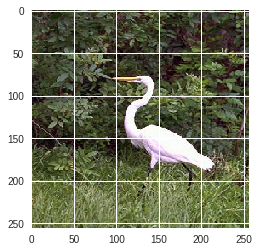

In [4]:
# Shows an image example of training set.
%matplotlib inline

import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

img = load_img('birds/egret/egr013.jpg',grayscale=False,target_size=(256,256),interpolation='nearest') 
x= img_to_array(img)
plt.imshow(x/255)


In [0]:
# Create a random sorted list to split set of images in train and test.
import random

randomList= random.sample(range(1,101),100)

formating = "{:03d}".format

formatedList = [formating(item) for item in randomList]

In [0]:
from PIL import Image

# The target size is set due to Xception neural networks requisities. 

xsize = 299
ysize = 299

paths=['egret','mandarin','owl','puffin','toucan','wood_duck']

maxImage= 80

pre=''
birdKind=-1

xL=[]
yL=[]


# For to read, resize and split data into train and test.
for j in paths[:]:
    if(j=='egret'):
        pre='/egr'
        birdKind=0
    elif(j=='mandarin'):
        pre='/man'
        birdKind=1
    elif(j=='owl'):
        pre='/owl'
        birdKind=2
    elif(j=='puffin'):
        pre='/puf'
        birdKind=3
    elif(j=='toucan'):
        pre='/tou'
        birdKind=4
    elif(j=='wood_duck'):
        pre='/wod'
        birdKind=5

        
    counter=0
    for i in formatedList[:]:
        
        # Resize images to 224X224
        
        img = Image.open('birds/'+j+pre+i+'.jpg')
        wpercent = (xsize/float(img.size[0]))
        img = img.resize((xsize,ysize), Image.ANTIALIAS)
        img.save('birds/'+j+pre+i+'.jpg')
        
        # Load resized image to save into train or test array.
        img = load_img('birds/'+j+pre+i+'.jpg',grayscale=False,target_size=(xsize,ysize),interpolation='nearest') 
        x= img_to_array(img)
        
        xL.append(x)
        yL.append(birdKind)
          
        counter=counter+1
        

In [0]:
# Convert lists to arrays.
from sklearn.model_selection import train_test_split

xList=np.asarray(xL)
yList=np.asarray(yL)

from sklearn.preprocessing import LabelEncoder
from keras.utils import np_utils

# Encode class values as integers.
encoder = LabelEncoder()
encoder.fit(yList)
encoded_Y = encoder.transform(yList)
# Convert integers to dummy variables (i.e. one hot encoded)
y = np_utils.to_categorical(encoded_Y)

xTrain,xTest,yTrain,yTest = train_test_split(xList, y, test_size=0.3, random_state=22)

In [8]:
# Delete pre existing files.
! rm -r datasets/
yTrain

rm: cannot remove 'datasets/': No such file or directory


array([[0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0., 0.],
       ...,
       [0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0., 0.],
       [0., 1., 0., 0., 0., 0.]], dtype=float32)

In [0]:
# Copy the images to folder(Not need but useful if we change the train generator)
from shutil import copy
counter = 0

if not os.path.exists('datasets/train/'):
  os.makedirs('datasets/train/egr')
  os.makedirs('datasets/train/man')
  os.makedirs('datasets/train/tou')
  os.makedirs('datasets/train/owl')
  os.makedirs('datasets/train/puf')
  os.makedirs('datasets/train/wod')
  
if not os.path.exists('datasets/test/'):
  os.makedirs('datasets/test/egr')
  os.makedirs('datasets/test/man')
  os.makedirs('datasets/test/tou')
  os.makedirs('datasets/test/owl')
  os.makedirs('datasets/test/puf')
  os.makedirs('datasets/test/wod')
    
for i in formatedList[:]:
  if counter < maxImage:
    copy('birds/egret/egr'+i+'.jpg','datasets/train/egr/egr'+i+'.jpg')
    copy('birds/mandarin/man'+i+'.jpg','datasets/train/man/man'+i+'.jpg')
    copy('birds/toucan/tou'+i+'.jpg','datasets/train/tou/tou'+i+'.jpg')
    copy('birds/owl/owl'+i+'.jpg','datasets/train/owl/owl'+i+'.jpg')
    copy('birds/puffin/puf'+i+'.jpg','datasets/train/puf/puf'+i+'.jpg')
    copy('birds/wood_duck/wod'+i+'.jpg','datasets/train/wod/wod'+i+'.jpg')
  else: 
      copy('birds/egret/egr'+i+'.jpg','datasets/test/egr/egr'+i+'.jpg')
      copy('birds/mandarin/man'+i+'.jpg','datasets/test/man/man'+i+'.jpg')
      copy('birds/toucan/tou'+i+'.jpg','datasets/test/tou/tou'+i+'.jpg')
      copy('birds/owl/owl'+i+'.jpg','datasets/test/owl/owl'+i+'.jpg')
      copy('birds/puffin/puf'+i+'.jpg','datasets/test/puf/puf'+i+'.jpg')
      copy('birds/wood_duck/wod'+i+'.jpg','datasets/test/wod/wod'+i+'.jpg')
      
  counter=counter+1

In [0]:
# Images general information.

# Data path information.
trainDataPath= 'datasets/train'
testDataPath= 'datasets/test'

# Images dimensions.
widthSize =  299
heightSize = 299

# Batch Size.

batchSize = 32

# Direct Prediction



### Build CNN 
We build and train a Convolutional neural network (CNN) to classify the birds' images in six different classes.  

In [16]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras import backend as K

outputClasses = 6

# Define if images have color channels firts in the array.
if K.image_data_format() == 'channels_first':
    input_shape = (3, widthSize, heightSize)
else:
    input_shape = (widthSize, heightSize, 3)

# Creates a CNN model using keras.

model = Sequential()
NumN=32
NumN2=64

model.add(Conv2D(NumN, (3, 3), input_shape=input_shape))
model.add(Activation('tanh'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))

model.add(Conv2D(NumN, (3, 3)))
model.add(Activation('tanh'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))

model.add(Conv2D(NumN2, (3, 3)))
model.add(Activation('tanh'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(NumN2))
model.add(Activation('tanh'))
model.add(Dropout(0.5))
model.add(Dense(outputClasses))
model.add(Activation('softmax'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 297, 297, 32)      896       
_________________________________________________________________
activation_6 (Activation)    (None, 297, 297, 32)      0         
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 148, 148, 32)      0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 148, 148, 32)      0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 146, 146, 32)      9248      
_________________________________________________________________
activation_7 (Activation)    (None, 146, 146, 32)      0         
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 73, 73, 32)        0         
__________

In [12]:
!pip3 install livelossplot

  Running setup.py bdist_wheel for livelossplot ... - \ done
  Stored in directory: /content/.cache/pip/wheels/67/8b/e9/3990164e3b2a421145b9d9d76fc8aa889225d495b043faeb73
Successfully built livelossplot


In [0]:

# Compile the convolutional neural network
from keras.optimizers import adam
from keras.optimizers import SGD
from keras.optimizers import adamax
from keras.optimizers import RMSprop
from livelossplot import PlotLossesKeras

#Defines optimizer.
op = SGD(lr=0.0001)

# Compile the neural network.
model.compile(loss='categorical_crossentropy',
             optimizer=op,
              metrics=['accuracy'])

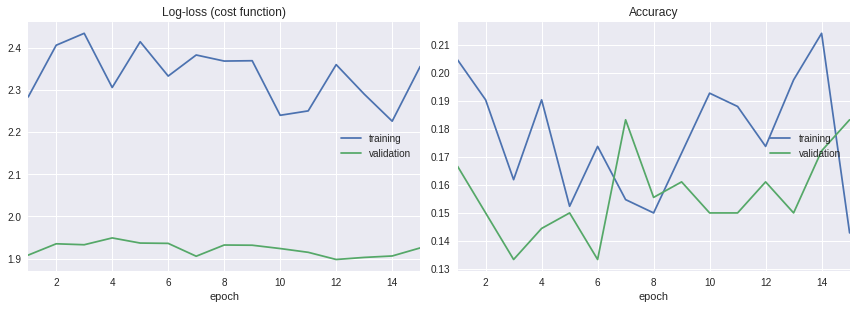

In [18]:
batch_size = 35
epochs = 15

trainingCNN = model.fit(xTrain, yTrain,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    shuffle = False, 
                    validation_data = [xTest,yTest],callbacks=[PlotLossesKeras()])

In [19]:
# Perform the neural network over the test set. 
print('Evaluating the test set...')
score = model.evaluate(xTest, yTest)

print('\nTest score:', score[0])
print('Test accuracy:', score[1])

Evaluating the test set...
180/180 [==============================] - 1s 6ms/step

Test score: 1.9253726058536105
Test accuracy: 0.18333333333333332


In [20]:
from sklearn.metrics import confusion_matrix,classification_report
import pandas as pd
import numpy as np

# Set the classes' names.
target_names = ['egr','man','owl','puf','tou','wod']

# Predict class in test.
Y_pred = model.predict(xTest)

# Choose the class with higher probability.
y_pred = np.argmax(Y_pred, axis=1)

print('-------------------------------------------------')
print('-------------------------------------------------')
print('-----------------Confusion Matrix----------------')
print(pd.DataFrame(confusion_matrix(np.argmax(yTest,axis=1), y_pred),columns=target_names, index=target_names))
print('-------------------------------------------------')
print('-------------------------------------------------\n')
print('---------------Classification Report-------------')

print(classification_report(np.argmax(yTest,axis=1), y_pred, target_names=target_names))

-------------------------------------------------
-------------------------------------------------
-----------------Confusion Matrix----------------
     egr  man  owl  puf  tou  wod
egr    2    0    0   24    0    3
man    1    0    0   28    0    4
owl    0    0    0   25    0    8
puf    2    0    0   28    0    4
tou    0    0    3   17    0    7
wod    2    0    2   17    0    3
-------------------------------------------------
-------------------------------------------------

---------------Classification Report-------------
             precision    recall  f1-score   support

        egr       0.29      0.07      0.11        29
        man       0.00      0.00      0.00        33
        owl       0.00      0.00      0.00        33
        puf       0.20      0.82      0.32        34
        tou       0.00      0.00      0.00        27
        wod       0.10      0.12      0.11        24

avg / total       0.10      0.18      0.09       180



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


## Pretrained CNN - Xception


In [21]:
from keras.applications.xception import Xception
modelXception = Xception(weights='imagenet', include_top=True)

91889664/91884032 [==============================] - 3s 0us/step


In [22]:
# Predict probabilities for each sample in test.
yPred1000P=modelXception.predict(xTest)

# Predict class for each sample in test.
yPred1000 = np.argmax(yPred1000P, axis=1)
yPred1000

array([659, 652, 722, 680, 659, 722, 772, 722, 398, 659, 659, 722, 767,
       659, 659, 659, 659, 659, 659, 722, 659, 398, 722, 659, 680, 722,
       722, 659, 659, 781, 659, 659, 659, 659, 659, 659, 772, 398, 659,
       652, 659, 659, 722, 722, 398, 781, 609, 722, 659, 235, 659, 659,
       418, 659, 659, 781, 659, 659, 659, 722, 659, 659, 722, 722, 659,
       680, 659, 772, 520, 659, 659, 659, 772, 722, 659, 659, 478, 722,
       772, 659, 659, 520, 722, 659, 722, 722, 722, 520, 659, 722, 722,
       659, 722, 772, 398, 659, 659, 722, 722, 659, 659, 680, 722, 659,
       722, 722, 659, 772, 659, 722, 659, 652, 722, 772, 781, 722, 659,
       722, 659, 722, 659, 659, 659, 722, 722, 722, 722, 652, 722, 659,
       772, 722, 659, 722, 722, 398, 659, 783, 659, 659, 659, 722, 659,
       722, 659, 659, 722, 659, 478, 659, 679, 398, 659, 722, 659, 659,
       659, 520, 659, 838, 659, 659, 398, 659, 722, 772, 722, 722, 659,
       659, 722, 722, 659, 659, 659, 722, 781, 478, 659, 722])

In [23]:
# Find the top 10 predicted classes in test set. 

unique, counts = np.unique(yPred1000, return_counts=True)

predFrequencies =pd.DataFrame( np.asarray((unique, counts)).T,columns=['Class','Count'])

sortDataFrame = predFrequencies.sort_values(by='Count',ascending=False)

topClasses=sortDataFrame.iloc[:10,:]

topClasses


,Class,Count
7,659,83
10,722,52
12,772,10
1,398,8
13,781,5
4,520,4
6,652,4
9,680,4
3,478,3
0,235,1


In [24]:
# Find the probabilities of being classify in top 10 classes for each image in test. 

testPredictorDataFrame = pd.DataFrame(yPred1000P)
topIndex=topClasses.as_matrix()[:,0]
finalPred = round(testPredictorDataFrame.iloc[:,topIndex],4)

finalPred

,659,722,772,398,781,520,652,680,478,235
0,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0
1,0.0000,0.0001,0.0000,0.0000,0.0000,0.0133,0.9723,0.0000,0.0000,0.0
2,0.0000,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0
3,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.5789,0.0000,0.0
4,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0
5,0.0000,0.8507,0.0000,0.0000,0.0000,0.0000,0.0837,0.0000,0.0014,0.0
6,0.0000,0.0000,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0
7,0.1614,0.8386,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0
8,0.0000,0.0001,0.0000,0.7974,0.0000,0.0000,0.1957,0.0061,0.0000,0.0
9,0.9988,0.0001,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0


In [25]:
# Create confusion matrix(6 classes, 10 top classes)

target_names = ['egr','man','owl','puf','tou','wod']

confusionMatrix = pd.DataFrame(np.zeros(shape=(6,topIndex.shape[0])),columns=topIndex)
yTestL = np.argmax(yTest,axis=1)
for index, row in finalPred.iterrows():
    maxClass=finalPred.iloc[index,:].argmax()
    trueClass = yTestL[index]
    confusionMatrix.loc[trueClass,maxClass]= confusionMatrix.loc[trueClass,maxClass]+1
    a=0

confusionMatrix.reset_index(level=0, inplace=True)

def set_index(row):
  if row['index']==0: return target_names[0]
  elif   row['index']==1: return target_names[1]
  elif   row['index']==2: return target_names[2]
  elif   row['index']==3: return target_names[3]
  elif   row['index']==4: return target_names[4]
  else:  return target_names[5]
    
confusionMatrix=confusionMatrix.assign(index=confusionMatrix.apply(set_index,axis=1))
confusionMatrix.columns.values[0]='Class'
    
confusionMatrix



/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: FutureWarning: 'argmax' is deprecated. Use 'idxmax' instead. The behavior of 'argmax' will be corrected to return the positional maximum in the future. Use 'series.values.argmax' to get the position of the maximum now.
  import sys


,Class,659,722,772,398,781,520,652,680,478,235
0,egr,15.0,6.0,2.0,2.0,2.0,0.0,0.0,1.0,0.0,1.0
1,man,13.0,14.0,3.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0
2,owl,18.0,6.0,2.0,2.0,0.0,2.0,3.0,0.0,0.0,0.0
3,puf,19.0,9.0,1.0,2.0,0.0,1.0,0.0,1.0,1.0,0.0
4,tou,11.0,9.0,0.0,0.0,2.0,0.0,1.0,3.0,1.0,0.0
5,wod,9.0,8.0,3.0,3.0,0.0,1.0,0.0,0.0,0.0,0.0


# Transfer Learning
We use the pre-trained CNN model as a feature extractor. The pretrained model was 'Xception'. We also replace the top part of the pretrained CNN with two layers of 256 and 6 neurons respectively.

## Xception Model

In [0]:
K.clear_session()

In [26]:
from keras.applications.xception import Xception
from keras.applications.vgg16 import VGG16

modelXceptionTF = Xception(weights='imagenet', include_top=False)

83689472/83683744 [==============================] - 3s 0us/step


In [0]:
# Pre-process X.
newXtrain=modelXceptionTF.predict(xTrain)

# Pre-process X.
newXtest=modelXceptionTF.predict(xTest)

In [28]:
newXtrain.shape

(420, 10, 10, 2048)

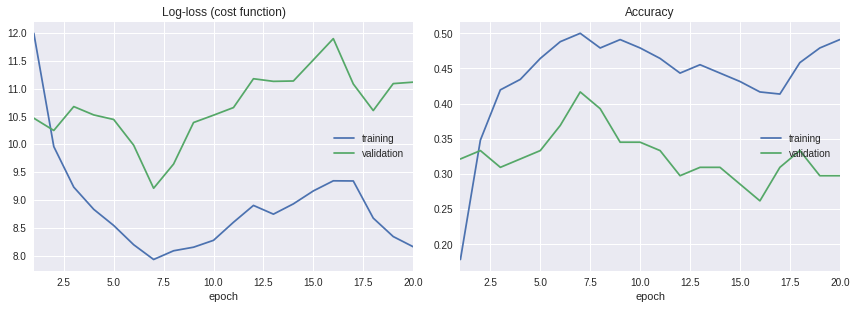

In [29]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras import backend as K
import keras.optimizers as opts
from livelossplot import PlotLossesKeras

# Model structure.
outputClasses = 6

# Create the model. 
cnn_transfer = Sequential()

# Apply a convolutional layer. 
cnn_transfer.add(Flatten(input_shape=newXtrain.shape[1:]))

# Add the fully connected.
cnn_transfer.add(Dense(256, activation='relu'))

# Add a dropout.
#cnn_transfer.add(Dropout(0.2))

# Add the fully connected.
cnn_transfer.add(Dense(outputClasses))

# Add the activation softmax.
cnn_transfer.add(Activation('softmax'))

print(cnn_transfer.summary(70))

# Compile the model. 
op=opts.Adam(lr=0.0001, epsilon=None, decay=0.0)
cnn_transfer.compile(loss = 'categorical_crossentropy',
              optimizer = op,
              metrics = ['accuracy'])

batch_size = 100
epochs = 20

trainingCNN_Transfer = cnn_transfer.fit(newXtrain, yTrain,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    shuffle = True, 
                    validation_split = 0.2,
                    callbacks=[PlotLossesKeras()])


In [30]:
# Perform the neural network over the test set. 
print('Evaluating the test set...')
score = cnn_transfer.evaluate(newXtest, yTest)

print('\nTest score:', score[0])
print('Test accuracy:', score[1])
Accu_Xception= score[1]
Accu_Xception

Evaluating the test set...
180/180 [==============================] - 0s 1ms/step

Test score: 11.26485735575358
Test accuracy: 0.28888888888888886


0.28888888888888886

In [31]:
from sklearn.metrics import confusion_matrix,classification_report
import pandas as pd
import numpy as np

# Set the classes' names.
target_names = ['egr','man','owl','puf','tou','wod']

# Predict class in test.
Y_pred = cnn_transfer.predict(newXtest)

# Choose the class with higher probability.
y_pred = np.argmax(Y_pred, axis=1)

print('-------------------------------------------------')
print('-------------------------------------------------')
print('-----------------Confusion Matrix----------------')
print(pd.DataFrame(confusion_matrix(yTest.argmax(axis=1), y_pred),columns=target_names, index=target_names))
print('-------------------------------------------------')
print('-------------------------------------------------\n')
print('---------------Classification Report-------------')

print(classification_report(yTest.argmax(axis=1), y_pred, target_names=target_names))

-------------------------------------------------
-------------------------------------------------
-----------------Confusion Matrix----------------
     egr  man  owl  puf  tou  wod
egr   21    2    6    0    0    0
man   11    7    1    1    0   13
owl   13    3   14    2    0    1
puf   13    6   11    1    0    3
tou   13    5    1    5    0    3
wod    8    5    1    1    0    9
-------------------------------------------------
-------------------------------------------------

---------------Classification Report-------------
             precision    recall  f1-score   support

        egr       0.27      0.72      0.39        29
        man       0.25      0.21      0.23        33
        owl       0.41      0.42      0.42        33
        puf       0.10      0.03      0.05        34
        tou       0.00      0.00      0.00        27
        wod       0.31      0.38      0.34        24

avg / total       0.22      0.29      0.24       180



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


## VGG16 Model

In [32]:
from keras.applications.xception import Xception
from keras.applications.vgg16 import VGG16

modelXceptionTF = VGG16(weights='imagenet', include_top=False)

58892288/58889256 [==============================] - 2s 0us/step


In [0]:
# Pre-process X.
newXtrain=modelXceptionTF.predict(xTrain)

# Pre-process X.
newXtest=modelXceptionTF.predict(xTest)

In [67]:
newXtrain.shape

(420, 9, 9, 512)

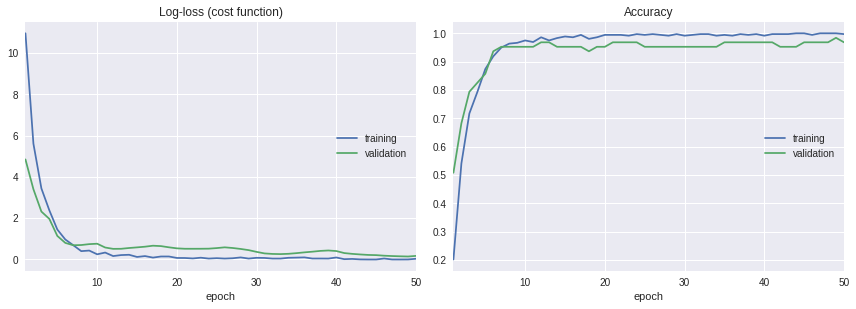

In [34]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras import backend as K
import keras.optimizers as opts
from livelossplot import PlotLossesKeras

# Model structure.
outputClasses = 6

# Create the model. 
cnn_transfer = Sequential()

# Apply a convolutional layer. 
cnn_transfer.add(Flatten(input_shape=newXtrain.shape[1:]))

# Add the fully connected.
cnn_transfer.add(Dense(256, activation='relu'))

# Add a dropout.
cnn_transfer.add(Dropout(0.5))

# Add the fully connected.
cnn_transfer.add(Dense(outputClasses))

# Add the activation softmax.
cnn_transfer.add(Activation('softmax'))

print(cnn_transfer.summary(70))

# Compile the model. 
op=opts.Adam(lr=0.0001,epsilon=None, decay=0.0)
cnn_transfer.compile(loss = 'categorical_crossentropy',
              optimizer = op,
              metrics = ['accuracy'])

batch_size = 150
epochs = 50

trainingCNN_Transfer = cnn_transfer.fit(newXtrain, yTrain,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    shuffle = True, 
                    validation_split = 0.15,
                    callbacks=[PlotLossesKeras()])


In [35]:
# Perform the neural network over the test set. 
print('Evaluating the test set...')
score = cnn_transfer.evaluate(newXtest, yTest)

print('\nTest score:', score[0])
print('Test accuracy:', score[1])

Accu_VGG16=score[1]
Accu_VGG16

Evaluating the test set...
180/180 [==============================] - 0s 529us/step

Test score: 0.08652253929071398
Test accuracy: 0.9833333333333333


0.9833333333333333

In [36]:
from sklearn.metrics import confusion_matrix,classification_report
import pandas as pd
import numpy as np

# Set the classes' names.
target_names = ['egr','man','owl','puf','tou','wod']

# Predict class in test.
Y_pred = cnn_transfer.predict(newXtest)

# Choose the class with higher probability.
y_pred = np.argmax(Y_pred, axis=1)

print('-------------------------------------------------')
print('-------------------------------------------------')
print('-----------------Confusion Matrix----------------')
print(pd.DataFrame(confusion_matrix(yTest.argmax(axis=1), y_pred),columns=target_names, index=target_names))
print('-------------------------------------------------')
print('-------------------------------------------------\n')
print('---------------Classification Report-------------')

print(classification_report(yTest.argmax(axis=1), y_pred, target_names=target_names))

-------------------------------------------------
-------------------------------------------------
-----------------Confusion Matrix----------------
     egr  man  owl  puf  tou  wod
egr   29    0    0    0    0    0
man    0   33    0    0    0    0
owl    0    0   32    0    0    1
puf    0    0    0   34    0    0
tou    0    0    0    0   27    0
wod    0    1    0    1    0   22
-------------------------------------------------
-------------------------------------------------

---------------Classification Report-------------
             precision    recall  f1-score   support

        egr       1.00      1.00      1.00        29
        man       0.97      1.00      0.99        33
        owl       1.00      0.97      0.98        33
        puf       0.97      1.00      0.99        34
        tou       1.00      1.00      1.00        27
        wod       0.96      0.92      0.94        24

avg / total       0.98      0.98      0.98       180



## ResNet50 Model

In [37]:
from keras.applications.resnet50 import ResNet50

modelXceptionTF = ResNet50(weights='imagenet', include_top=False)

94658560/94653016 [==============================] - 5s 0us/step


In [0]:
# Pre-process X.
newXtrain=modelXceptionTF.predict(xTrain)

# Pre-process X.
newXtest=modelXceptionTF.predict(xTest)

In [39]:
newXtrain.shape

(420, 1, 1, 2048)

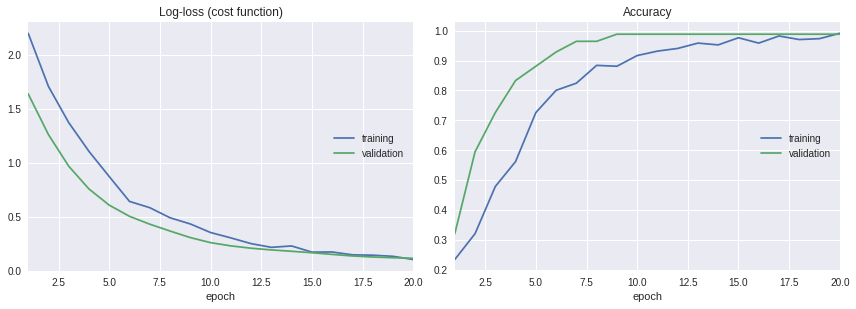

In [41]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras import backend as K
import keras.optimizers as opts
from livelossplot import PlotLossesKeras

# Model structure.
outputClasses = 6

# Create the model. 
cnn_transfer = Sequential()

# Apply a convolutional layer. 
cnn_transfer.add(Flatten(input_shape=newXtrain.shape[1:]))

# Add the fully connected.
cnn_transfer.add(Dense(256, activation='relu'))

# Add a dropout.
cnn_transfer.add(Dropout(0.5))

# Add the fully connected.
cnn_transfer.add(Dense(outputClasses))

# Add the activation softmax.
cnn_transfer.add(Activation('softmax'))

print(cnn_transfer.summary(70))

# Compile the model. 
op=opts.Adam(lr=0.0001, epsilon=None, decay=0.0)
cnn_transfer.compile(loss = 'categorical_crossentropy',
              optimizer = op,
              metrics = ['accuracy'])

batch_size = 100
epochs = 20

trainingCNN_Transfer = cnn_transfer.fit(newXtrain, yTrain,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    shuffle = True, 
                    validation_split = 0.2,
                    callbacks=[PlotLossesKeras()])

In [42]:
# Perform the neural network over the test set. 
print('Evaluating the test set...')
score = cnn_transfer.evaluate(newXtest, yTest)

print('\nTest score:', score[0])
print('Test accuracy:', score[1])
Accu_RestNet=score[1]
Accu_RestNet

Evaluating the test set...
180/180 [==============================] - 0s 149us/step

Test score: 0.11291628711753421
Test accuracy: 0.9888888888888889


0.9888888888888889

In [43]:
from sklearn.metrics import confusion_matrix,classification_report
import pandas as pd
import numpy as np

# Set the classes' names.
target_names = ['egr','man','owl','puf','tou','wod']

# Predict class in test.
Y_pred = cnn_transfer.predict(newXtest)

# Choose the class with higher probability.
y_pred = np.argmax(Y_pred, axis=1)

print('-------------------------------------------------')
print('-------------------------------------------------')
print('-----------------Confusion Matrix----------------')
print(pd.DataFrame(confusion_matrix(yTest.argmax(axis=1), y_pred),columns=target_names, index=target_names))
print('-------------------------------------------------')
print('-------------------------------------------------\n')
print('---------------Classification Report-------------')

print(classification_report(yTest.argmax(axis=1), y_pred, target_names=target_names))

-------------------------------------------------
-------------------------------------------------
-----------------Confusion Matrix----------------
     egr  man  owl  puf  tou  wod
egr   29    0    0    0    0    0
man    0   31    0    1    0    1
owl    0    0   33    0    0    0
puf    0    0    0   34    0    0
tou    0    0    0    0   27    0
wod    0    0    0    0    0   24
-------------------------------------------------
-------------------------------------------------

---------------Classification Report-------------
             precision    recall  f1-score   support

        egr       1.00      1.00      1.00        29
        man       1.00      0.94      0.97        33
        owl       1.00      1.00      1.00        33
        puf       0.97      1.00      0.99        34
        tou       1.00      1.00      1.00        27
        wod       0.96      1.00      0.98        24

avg / total       0.99      0.99      0.99       180



## InceptionV3 Model

In [44]:
from keras.applications.inception_v3 import InceptionV3

modelXceptionTF = InceptionV3(weights='imagenet', include_top=False)

87916544/87910968 [==============================] - 5s 0us/step


In [0]:
# Pre-process X.
newXtrain=modelXceptionTF.predict(xTrain)

# Pre-process X.
newXtest=modelXceptionTF.predict(xTest)

In [47]:
newXtrain.shape

(420, 8, 8, 2048)

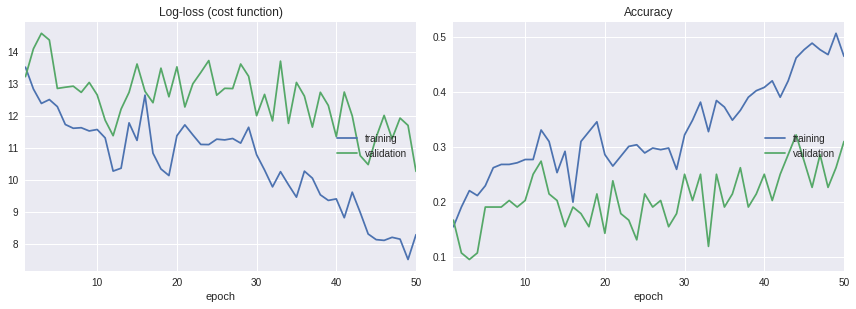

In [49]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras import backend as K
import keras.optimizers as opts
from livelossplot import PlotLossesKeras

# Model structure.
outputClasses = 6

# Create the model. 
cnn_transfer = Sequential()

# Apply a convolutional layer. 
cnn_transfer.add(Flatten(input_shape=newXtrain.shape[1:]))

# Add the fully connected.
cnn_transfer.add(Dense(256, activation='relu'))

# Add a dropout.
cnn_transfer.add(Dropout(0.2))

# Add the fully connected.
cnn_transfer.add(Dense(outputClasses))

# Add the activation softmax.
cnn_transfer.add(Activation('softmax'))

print(cnn_transfer.summary(70))

# Compile the model. 
op=opts.SGD(lr=0.0001, decay=0.0)
cnn_transfer.compile(loss = 'categorical_crossentropy',
              optimizer = op,
              metrics = ['accuracy'])

batch_size = 100
epochs = 50

trainingCNN_Transfer = cnn_transfer.fit(newXtrain, yTrain,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    shuffle = True, 
                    validation_split = 0.2,
                    callbacks=[PlotLossesKeras()])

In [50]:
# Perform the neural network over the test set. 
print('Evaluating the test set...')
score = cnn_transfer.evaluate(newXtest, yTest)

print('\nTest score:', score[0])
print('Test accuracy:', score[1])
Accu_InceptionV3=score[1]
Accu_InceptionV3

Evaluating the test set...
180/180 [==============================] - 0s 1ms/step

Test score: 8.754955334133571
Test accuracy: 0.43888888955116273


0.43888888955116273

In [51]:
from sklearn.metrics import confusion_matrix,classification_report
import pandas as pd
import numpy as np

# Set the classes' names.
target_names = ['egr','man','owl','puf','tou','wod']

# Predict class in test.
Y_pred = cnn_transfer.predict(newXtest)

# Choose the class with higher probability.
y_pred = np.argmax(Y_pred, axis=1)

print('-------------------------------------------------')
print('-------------------------------------------------')
print('-----------------Confusion Matrix----------------')
print(pd.DataFrame(confusion_matrix(yTest.argmax(axis=1), y_pred),columns=target_names, index=target_names))
print('-------------------------------------------------')
print('-------------------------------------------------\n')
print('---------------Classification Report-------------')

print(classification_report(yTest.argmax(axis=1), y_pred, target_names=target_names))

-------------------------------------------------
-------------------------------------------------
-----------------Confusion Matrix----------------
     egr  man  owl  puf  tou  wod
egr    3    2    8   16    0    0
man    0   24    1    8    0    0
owl    0    3   25    5    0    0
puf    0    1    6   27    0    0
tou    0    7    5   15    0    0
wod    0   15    3    6    0    0
-------------------------------------------------
-------------------------------------------------

---------------Classification Report-------------
             precision    recall  f1-score   support

        egr       1.00      0.10      0.19        29
        man       0.46      0.73      0.56        33
        owl       0.52      0.76      0.62        33
        puf       0.35      0.79      0.49        34
        tou       0.00      0.00      0.00        27
        wod       0.00      0.00      0.00        24

avg / total       0.41      0.44      0.34       180



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


## Comparing Transfer Learning Models

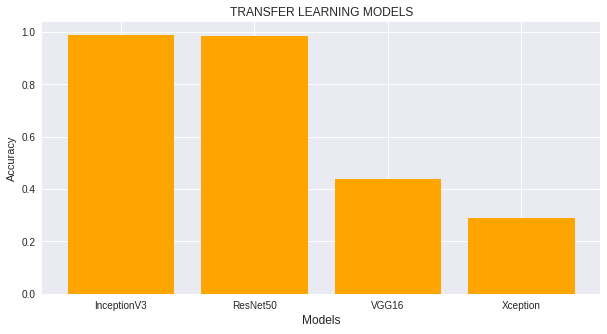

In [53]:
plt.figure(figsize=(10,5))
plt.bar(["Xception","VGG16","ResNet50","InceptionV3"],sorted([Accu_Xception,Accu_VGG16,Accu_RestNet,Accu_InceptionV3]),color="orange",align='center')
plt.title("TRANSFER LEARNING MODELS")
plt.xlabel("Models",fontsize=12)
plt.ylabel("Accuracy")
plt.show()

# Fine Tuning 

We use the pre-trained CNN model as a feature extractor. The pretrained model was 'Xception'. We also replace the top part of the pretrained CNN with two layers of 256 and 6 neurons respectively. Weigths in Xception are also trained.

In [0]:
K.clear_session()

## Xception Model

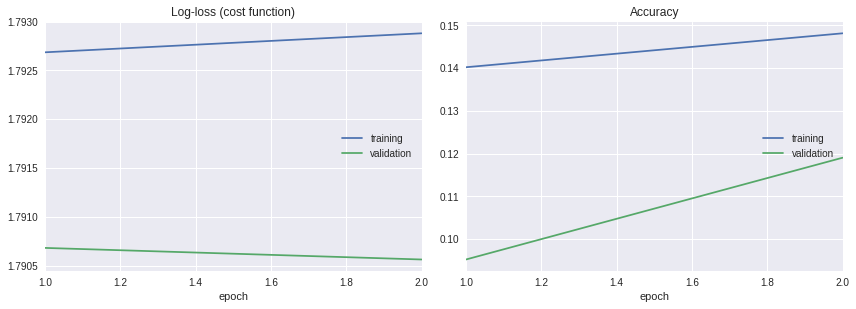

In [16]:
from keras.applications.xception import Xception
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras import backend as K
import keras.optimizers as opts
from livelossplot import PlotLossesKeras

# Model structure.
outputClasses = 6

# Load pretrained model..
modelXception = Xception(weights='imagenet', include_top=False, input_shape=(xsize,ysize,3))
#modelXception = VGG16(weights='imagenet', include_top=False, input_shape=(xsize,ysize,3))

# Create the model. 
modelFineTuning = Sequential()

# Add pretrained model. 
modelFineTuning.add(modelXception)

# Apply a convolutional layer. 
modelFineTuning.add(Flatten())

# Add the fully connected.
modelFineTuning.add(Dense(256, activation='softmax'))

# Add a dropout.
modelFineTuning.add(Dropout(0.5))

# Add the fully connected.
modelFineTuning.add(Dense(outputClasses))

# Add the activation softmax.
modelFineTuning.add(Activation('softmax'))

modelFineTuning.summary(70)

# Compile the model. 
op=opts.SGD(lr=0.0001, decay=0.0)
#op=opts.RMSprop()
modelFineTuning.compile(loss = 'categorical_crossentropy',
              optimizer = op,
              metrics = ['accuracy'])

batch_size = 10
epochs = 2

# Train Model.
trainingCNN_FineTuning = modelFineTuning.fit(xTrain, yTrain,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    shuffle = True, 
                    validation_split =0.1,callbacks=[PlotLossesKeras()])



In [24]:
# Perform the neural network over the test set. 
print('Evaluating the test set...')
score = modelFineTuning.evaluate(xTest, yTest)

print('\nTest score:', score[0])
print('Test accuracy:', score[1])
Accur_Xception=score[1]
Accur_Xception

Evaluating the test set...
180/180 [==============================] - 4s 21ms/step

Test score: 1.7934069156646728
Test accuracy: 0.10000000066227382


0.10000000066227382

In [0]:
from sklearn.metrics import confusion_matrix,classification_report
import pandas as pd
import numpy as np

# Set the classes' names.
target_names = ['egr','man','owl','puf','tou','wod']

# Predict class in test.
Y_pred = modelFineTuning.predict(xTest)

# Choose the class with higher probability.
y_pred = np.argmax(Y_pred, axis=1)

print('-------------------------------------------------')
print('-------------------------------------------------')
print('-----------------Confusion Matrix----------------')
print(pd.DataFrame(confusion_matrix(yTest.argmax(axis=1), y_pred),columns=target_names, index=target_names))
print('-------------------------------------------------')
print('-------------------------------------------------\n')
print('---------------Classification Report-------------')

print(classification_report(yTest.argmax(axis=1), y_pred, target_names=target_names))

## VGG16 Model

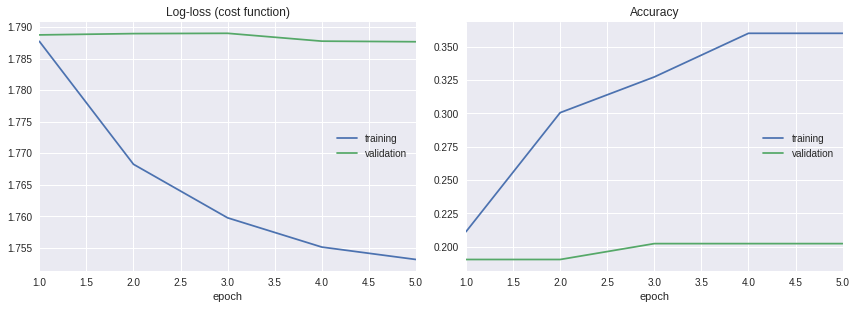

In [32]:
from keras.applications.xception import Xception
from keras.applications.vgg16 import VGG16
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras import backend as K
import keras.optimizers as opts
from livelossplot import PlotLossesKeras

# Model structure.
outputClasses = 6

# Load pretrained model..
modelXception = VGG16(weights='imagenet', include_top=False, input_shape=(xsize,ysize,3))

# Create the model. 
modelFineTuning = Sequential()

# Add pretrained model. 
modelFineTuning.add(modelXception)

# Apply a convolutional layer. 
modelFineTuning.add(Flatten())

# Add the fully connected.
modelFineTuning.add(Dense(256, activation='softmax'))

# Add a dropout.
#modelFineTuning.add(Dropout(0.5))

# Add the fully connected.
modelFineTuning.add(Dense(outputClasses))

# Add the activation softmax.
modelFineTuning.add(Activation('softmax'))

modelFineTuning.summary(70)

# Compile the model. 
op=opts.adadelta(lr=0.001, decay=0.0)
#op=opts.RMSprop()
modelFineTuning.compile(loss = 'categorical_crossentropy',
              optimizer = op,
              metrics = ['accuracy'])

batch_size = 10
epochs = 5

# Train Model.
trainingCNN_FineTuning = modelFineTuning.fit(xTrain, yTrain,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    shuffle = True, 
                    validation_split =0.2,callbacks=[PlotLossesKeras()])


In [33]:
# Perform the neural network over the test set. 
print('Evaluating the test set...')
score = modelFineTuning.evaluate(xTest, yTest)

print('\nTest score:', score[0])
print('Test accuracy:', score[1])
Accur_VGG16=score[1]
Accur_VGG16

Evaluating the test set...
180/180 [==============================] - 3s 19ms/step

Test score: 1.7819314161936441
Test accuracy: 0.21666666699780357


0.21666666699780357

In [34]:
from sklearn.metrics import confusion_matrix,classification_report
import pandas as pd
import numpy as np

# Set the classes' names.
target_names = ['egr','man','owl','puf','tou','wod']

# Predict class in test.
Y_pred = modelFineTuning.predict(xTest)

# Choose the class with higher probability.
y_pred = np.argmax(Y_pred, axis=1)

print('-------------------------------------------------')
print('-------------------------------------------------')
print('-----------------Confusion Matrix----------------')
print(pd.DataFrame(confusion_matrix(yTest.argmax(axis=1), y_pred),columns=target_names, index=target_names))
print('-------------------------------------------------')
print('-------------------------------------------------\n')
print('---------------Classification Report-------------')

print(classification_report(yTest.argmax(axis=1), y_pred, target_names=target_names))

-------------------------------------------------
-------------------------------------------------
-----------------Confusion Matrix----------------
     egr  man  owl  puf  tou  wod
egr    7   10    6    1    3    2
man    3   13    9    2    4    2
owl    3    8    8    6    4    4
puf    5    6    9    5    5    4
tou    3    4   11    4    3    2
wod    2    6    4    4    5    3
-------------------------------------------------
-------------------------------------------------

---------------Classification Report-------------
             precision    recall  f1-score   support

        egr       0.30      0.24      0.27        29
        man       0.28      0.39      0.33        33
        owl       0.17      0.24      0.20        33
        puf       0.23      0.15      0.18        34
        tou       0.12      0.11      0.12        27
        wod       0.18      0.12      0.15        24

avg / total       0.22      0.22      0.21       180



## ResNet50 Model

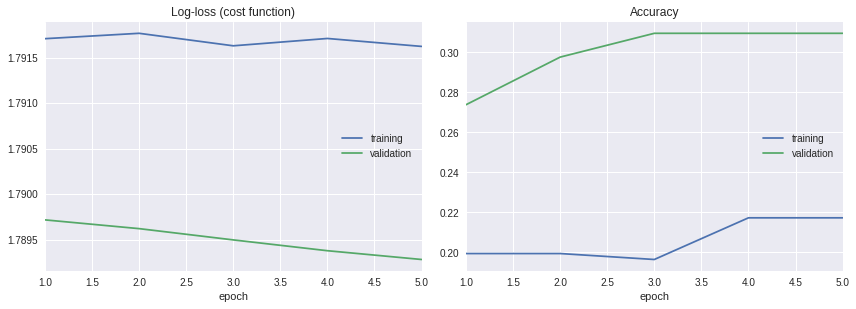

In [35]:
from keras.applications.xception import Xception
from keras.applications.vgg16 import VGG16
from keras.applications.resnet50 import ResNet50
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras import backend as K
import keras.optimizers as opts
from livelossplot import PlotLossesKeras

# Model structure.
outputClasses = 6

# Load pretrained model..
modelXception = ResNet50(weights='imagenet', include_top=False, input_shape=(xsize,ysize,3))

# Create the model. 
modelFineTuning = Sequential()

# Add pretrained model. 
modelFineTuning.add(modelXception)

# Apply a convolutional layer. 
modelFineTuning.add(Flatten())

# Add the fully connected.
modelFineTuning.add(Dense(256, activation='softmax'))

# Add a dropout.
#modelFineTuning.add(Dropout(0.5))

# Add the fully connected.
modelFineTuning.add(Dense(outputClasses))

# Add the activation softmax.
modelFineTuning.add(Activation('softmax'))

modelFineTuning.summary(70)

# Compile the model. 
op=opts.adadelta(lr=0.001, decay=0.0)
#op=opts.RMSprop()
modelFineTuning.compile(loss = 'categorical_crossentropy',
              optimizer = op,
              metrics = ['accuracy'])

batch_size = 10
epochs = 5

# Train Model.
trainingCNN_FineTuning = modelFineTuning.fit(xTrain, yTrain,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    shuffle = True, 
                    validation_split =0.2,callbacks=[PlotLossesKeras()])

In [36]:
# Perform the neural network over the test set. 
print('Evaluating the test set...')
score = modelFineTuning.evaluate(xTest, yTest)

print('\nTest score:', score[0])
print('Test accuracy:', score[1])
Accur_ResNet=score[1]
Accur_ResNet

Evaluating the test set...
180/180 [==============================] - 4s 22ms/step

Test score: 1.790646998087565
Test accuracy: 0.26111111243565877


0.26111111243565877

In [37]:
from sklearn.metrics import confusion_matrix,classification_report
import pandas as pd
import numpy as np

# Set the classes' names.
target_names = ['egr','man','owl','puf','tou','wod']

# Predict class in test.
Y_pred = modelFineTuning.predict(xTest)

# Choose the class with higher probability.
y_pred = np.argmax(Y_pred, axis=1)

print('-------------------------------------------------')
print('-------------------------------------------------')
print('-----------------Confusion Matrix----------------')
print(pd.DataFrame(confusion_matrix(yTest.argmax(axis=1), y_pred),columns=target_names, index=target_names))
print('-------------------------------------------------')
print('-------------------------------------------------\n')
print('---------------Classification Report-------------')

print(classification_report(yTest.argmax(axis=1), y_pred, target_names=target_names))

-------------------------------------------------
-------------------------------------------------
-----------------Confusion Matrix----------------
     egr  man  owl  puf  tou  wod
egr    0    0    7   11    7    4
man    0    0    9   23    0    1
owl    0    0   13   17    0    3
puf    0    0    2   31    0    1
tou    0    0    8   15    2    2
wod    0    0    3   18    2    1
-------------------------------------------------
-------------------------------------------------

---------------Classification Report-------------
             precision    recall  f1-score   support

        egr       0.00      0.00      0.00        29
        man       0.00      0.00      0.00        33
        owl       0.31      0.39      0.35        33
        puf       0.27      0.91      0.42        34
        tou       0.18      0.07      0.11        27
        wod       0.08      0.04      0.06        24

avg / total       0.15      0.26      0.17       180



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


## InceptionV3 Model

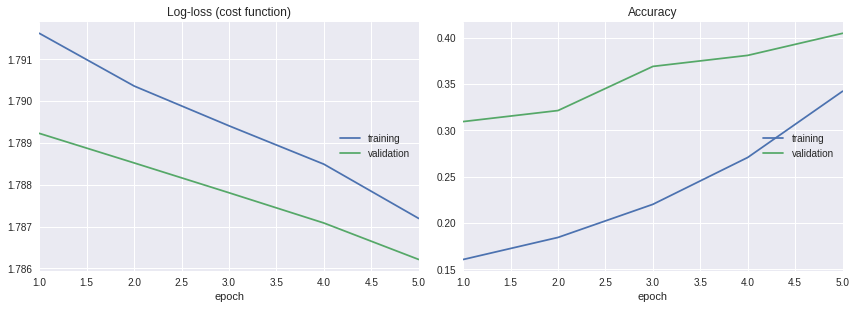

In [38]:
from keras.applications.xception import Xception
from keras.applications.vgg16 import VGG16
from keras.applications.resnet50 import ResNet50
from keras.applications.inception_v3 import InceptionV3
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras import backend as K
import keras.optimizers as opts
from livelossplot import PlotLossesKeras

# Model structure.
outputClasses = 6

# Load pretrained model..
modelXception = InceptionV3(weights='imagenet', include_top=False, input_shape=(xsize,ysize,3))

# Create the model. 
modelFineTuning = Sequential()

# Add pretrained model. 
modelFineTuning.add(modelXception)

# Apply a convolutional layer. 
modelFineTuning.add(Flatten())

# Add the fully connected.
modelFineTuning.add(Dense(256, activation='softmax'))

# Add a dropout.
#modelFineTuning.add(Dropout(0.5))

# Add the fully connected.
modelFineTuning.add(Dense(outputClasses))

# Add the activation softmax.
modelFineTuning.add(Activation('softmax'))

modelFineTuning.summary(70)

# Compile the model. 
op=opts.adadelta(lr=0.001, decay=0.0)
#op=opts.RMSprop()
modelFineTuning.compile(loss = 'categorical_crossentropy',
              optimizer = op,
              metrics = ['accuracy'])

batch_size = 10

epochs = 5

# Train Model.
trainingCNN_FineTuning = modelFineTuning.fit(xTrain, yTrain,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    shuffle = True, 
                    validation_split =0.2,callbacks=[PlotLossesKeras()])

In [39]:
# Perform the neural network over the test set. 
print('Evaluating the test set...')
score = modelFineTuning.evaluate(xTest, yTest)

print('\nTest score:', score[0])
print('Test accuracy:', score[1])
Accur_InceptionV3=score[1]
Accur_InceptionV3

Evaluating the test set...
180/180 [==============================] - 3s 16ms/step

Test score: 1.7882328510284424
Test accuracy: 0.3000000013245477


0.3000000013245477

In [40]:
from sklearn.metrics import confusion_matrix,classification_report
import pandas as pd
import numpy as np

# Set the classes' names.
target_names = ['egr','man','owl','puf','tou','wod']

# Predict class in test.
Y_pred = modelFineTuning.predict(xTest)

# Choose the class with higher probability.
y_pred = np.argmax(Y_pred, axis=1)

print('-------------------------------------------------')
print('-------------------------------------------------')
print('-----------------Confusion Matrix----------------')
print(pd.DataFrame(confusion_matrix(yTest.argmax(axis=1), y_pred),columns=target_names, index=target_names))
print('-------------------------------------------------')
print('-------------------------------------------------\n')
print('---------------Classification Report-------------')

print(classification_report(yTest.argmax(axis=1), y_pred, target_names=target_names))

-------------------------------------------------
-------------------------------------------------
-----------------Confusion Matrix----------------
     egr  man  owl  puf  tou  wod
egr   19    2    0    1    0    7
man    3    5    1    1    4   19
owl   13    2    3    1    2   12
puf    7    4    2    4    4   13
tou    6    4    1    1    8    7
wod    0    4    0    4    1   15
-------------------------------------------------
-------------------------------------------------

---------------Classification Report-------------
             precision    recall  f1-score   support

        egr       0.40      0.66      0.49        29
        man       0.24      0.15      0.19        33
        owl       0.43      0.09      0.15        33
        puf       0.33      0.12      0.17        34
        tou       0.42      0.30      0.35        27
        wod       0.21      0.62      0.31        24

avg / total       0.34      0.30      0.27       180



## Comparing FIne Tuning Models

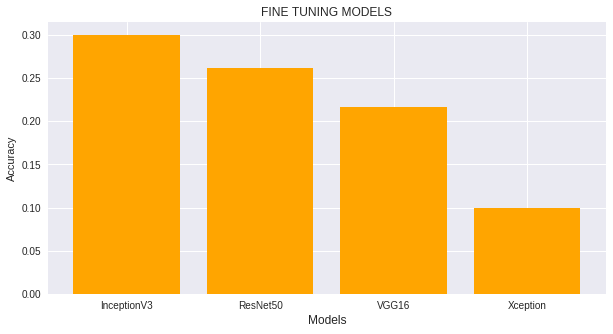

In [41]:
plt.figure(figsize=(10,5))
plt.bar(["Xception","VGG16","ResNet50","InceptionV3"],sorted([Accur_Xception,Accur_VGG16,Accur_ResNet,Accur_InceptionV3]),color="orange",align='center')
plt.title("FINE TUNING MODELS")
plt.xlabel("Models",fontsize=12)
plt.ylabel("Accuracy")
plt.show()

In [0]:
from sklearn.metrics import confusion_matrix,classification_report
import pandas as pd
import numpy as np

# Set the classes' names.
target_names = ['egr','man','owl','puf','tou','wod']

# Predict class in test.
Y_pred = modelFineTuning.predict(xTest)

# Choose the class with higher probability.
y_pred = np.argmax(Y_pred, axis=1)

print('-------------------------------------------------')
print('-------------------------------------------------')
print('-----------------Confusion Matrix----------------')
print(pd.DataFrame(confusion_matrix(yTest.argmax(axis=1), y_pred),columns=target_names, index=target_names))
print('-------------------------------------------------')
print('-------------------------------------------------\n')
print('---------------Classification Report-------------')

print(classification_report(yTest.argmax(axis=1), y_pred, target_names=target_names))

In [18]:
from tensorflow.python.client import device_lib
device_lib.list_local_devices()

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 3618519897196186857, name: "/device:GPU:0"
 device_type: "GPU"
 memory_limit: 187891712
 locality {
   bus_id: 1
   links {
   }
 }
 incarnation: 3618103794504563862
 physical_device_desc: "device: 0, name: Tesla K80, pci bus id: 0000:00:04.0, compute capability: 3.7"]

In [19]:
!cat /proc/meminfo

MemTotal:       13335192 kB
MemFree:         1341256 kB
MemAvailable:    7542108 kB
Buffers:          133316 kB
Cached:          5182740 kB
SwapCached:            0 kB
Active:          5598644 kB
Inactive:        5698376 kB
Active(anon):    4893996 kB
Inactive(anon):   244268 kB
Active(file):     704648 kB
Inactive(file):  5454108 kB
Unevictable:           0 kB
Mlocked:               0 kB
SwapTotal:             0 kB
SwapFree:              0 kB
Dirty:               428 kB
Writeback:             0 kB
AnonPages:       5981100 kB
Mapped:           742936 kB
Shmem:            424860 kB
Slab:             416524 kB
SReclaimable:     368236 kB
SUnreclaim:        48288 kB
KernelStack:        3648 kB
PageTables:        19800 kB
NFS_Unstable:          0 kB
Bounce:                0 kB
WritebackTmp:          0 kB
CommitLimit:     6667596 kB
Committed_AS:    7971992 kB
VmallocTotal:   34359738367 kB
VmallocUsed:           0 kB
VmallocChunk:          0 kB
AnonHugePages:         0 kB
ShmemHugePages:  

In [0]:
!kill -9 -1

In [1]:
!cat /proc/cpuinfo

processor	: 0
vendor_id	: GenuineIntel
cpu family	: 6
model		: 63
model name	: Intel(R) Xeon(R) CPU @ 2.30GHz
stepping	: 0
microcode	: 0x1
cpu MHz		: 2300.000
cache size	: 46080 KB
physical id	: 0
siblings	: 2
core id		: 0
cpu cores	: 1
apicid		: 0
initial apicid	: 0
fpu		: yes
fpu_exception	: yes
cpuid level	: 13
wp		: yes
flags		: fpu vme de pse tsc msr pae mce cx8 apic sep mtrr pge mca cmov pat pse36 clflush mmx fxsr sse sse2 ss ht syscall nx pdpe1gb rdtscp lm constant_tsc rep_good nopl xtopology nonstop_tsc cpuid pni pclmulqdq ssse3 fma cx16 sse4_1 sse4_2 x2apic movbe popcnt aes xsave avx f16c rdrand hypervisor lahf_lm abm pti fsgsbase tsc_adjust bmi1 avx2 smep bmi2 erms xsaveopt
bugs		: cpu_meltdown spectre_v1 spectre_v2
bogomips	: 4600.00
clflush size	: 64
cache_alignment	: 64
address sizes	: 46 bits physical, 48 bits virtual
power management:

processor	: 1
vendor_id	: GenuineIntel
cpu family	: 6
model		: 63
model name	: Intel(R) Xeon(R) CPU @ 2.30GHz
stepping	: 0
microcode	: 0x